# Stress detection for IT professionals using machine learning

# **Importing Necessary Packages and Loading The Dataset**

In [122]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [123]:
#Let's Load the data using panda library
df = pd.read_csv(r'D:\TK191129--STRESS DETECTION IN IT PROFESSIONALS USING MACHINE LEARNING\TK191129--STRESS DETECTION IN IT PROFESSIONALS USING MACHINE LEARNING\CODE\BACKEND\stress_detection_IT_professionals_dataset.csv')

In [124]:
#Let's print the first 5 records of the data
df.head()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,87,5.56,5,28,31,6
1,74,5.89,5,25,42,3
2,79,4.58,9,26,28,4
3,92,5.10,7,30,37,3
4,88,5.23,8,29,35,6


In [125]:
#Let's print the last 5 records of the data
df.tail()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
996,68,6.40,7,24,31,5
997,70,5.16,8,23,27,3
998,58,3.86,6,21,34,6
999,66,3.69,8,22,36,1
1000,200,6.00,8,50,6,95


In [126]:
#Printing the shape of the dataset
df.shape

(1001, 6)

In [127]:
#Getting the data types of all the columns
df.dtypes

Heart_Rate             int64
Skin_Conductivity    float64
Hours_Worked           int64
Stress_Level           int64
Emails_Sent            int64
Meetings_Attended      int64
dtype: object

In [128]:
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**Here in our dataset we have both object and float data types.**

In [129]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Heart_Rate         1001 non-null   int64  
 1   Skin_Conductivity  1001 non-null   float64
 2   Hours_Worked       1001 non-null   int64  
 3   Stress_Level       1001 non-null   int64  
 4   Emails_Sent        1001 non-null   int64  
 5   Meetings_Attended  1001 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [130]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


Heart_Rate            57
Skin_Conductivity    368
Hours_Worked          13
Stress_Level          17
Emails_Sent           38
Meetings_Attended     11
dtype: int64

In [131]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,mean,std,min,25%,50%,75%,max
Heart_Rate,1001.0,69.167832,10.698963,39.00,63.00,69.00,76.00,200.00
Skin_Conductivity,1001.0,5.014645,0.968661,2.01,4.35,5.03,5.63,8.17
Hours_Worked,1001.0,8.385614,1.931619,2.00,7.00,8.00,10.00,14.00
Stress_Level,1001.0,23.380619,2.727633,16.00,22.00,23.00,25.00,50.00
Emails_Sent,1001.0,29.768232,5.628519,6.00,26.00,30.00,33.00,49.00
Meetings_Attended,1001.0,3.050949,3.379408,0.00,2.00,3.00,4.00,95.00


**The above table shows the statistical information about the each and every column of our data set.**

In [132]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

np.int64(0)

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [133]:
#Let's check the null values present in the data set
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

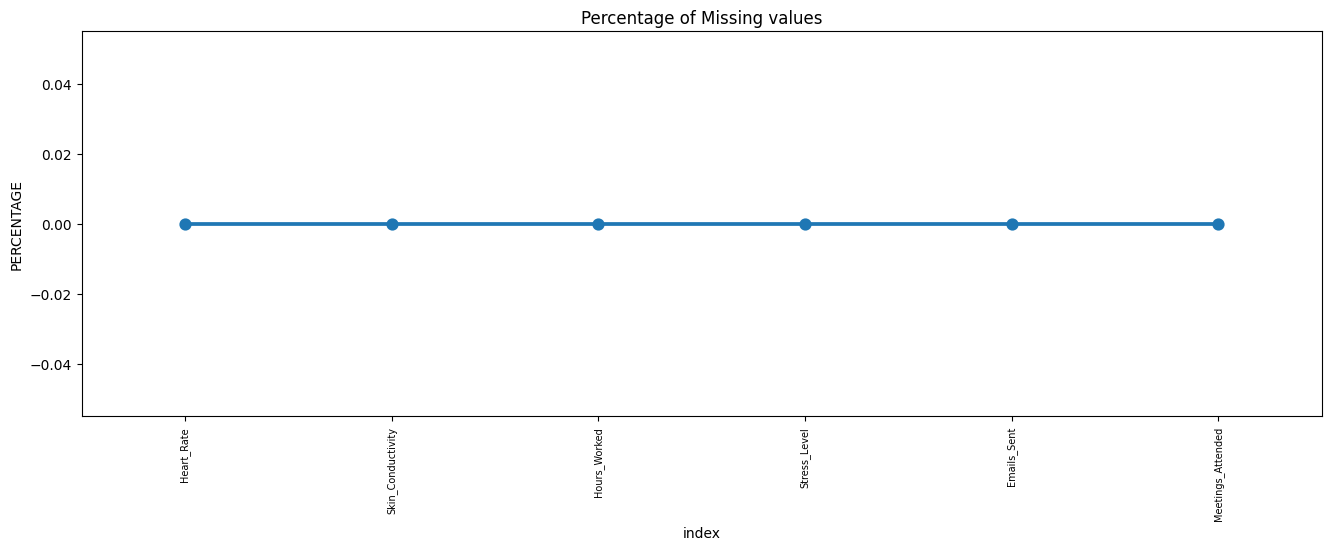

In [134]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

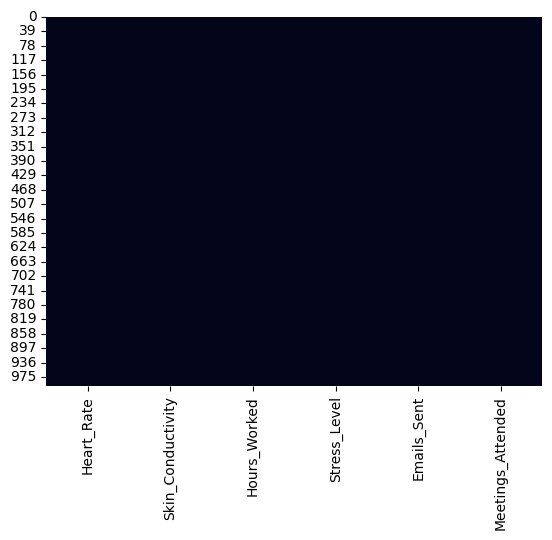

In [135]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [136]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['Heart_Rate', 'Skin_Conductivity', 'Hours_Worked', 'Stress_Level',
       'Emails_Sent', 'Meetings_Attended'],
      dtype='object')

<Axes: xlabel='Stress_Level', ylabel='count'>

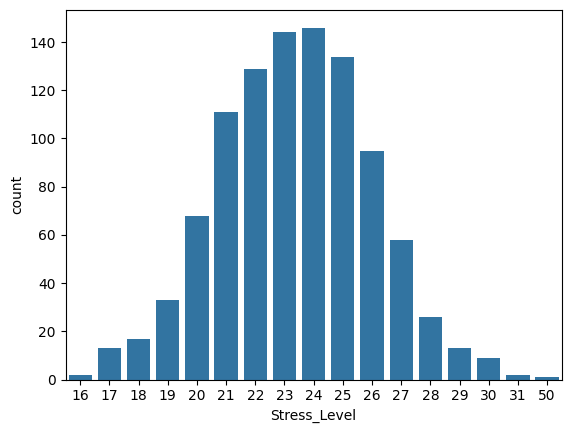

In [137]:
#let's see loan_amnt by using countplot
sns.countplot(x=df.Stress_Level)

C:\Users\user\AppData\Local\Temp\ipykernel_8616\3858069671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

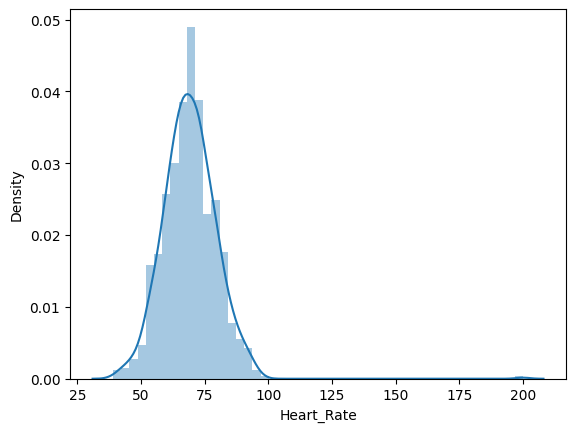

In [138]:
#  distribution plot for Heart_Rate column
sns.distplot(df['Heart_Rate'])

C:\Users\user\AppData\Local\Temp\ipykernel_8616\723861079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Skin_Conductivity'])


<Axes: xlabel='Skin_Conductivity', ylabel='Density'>

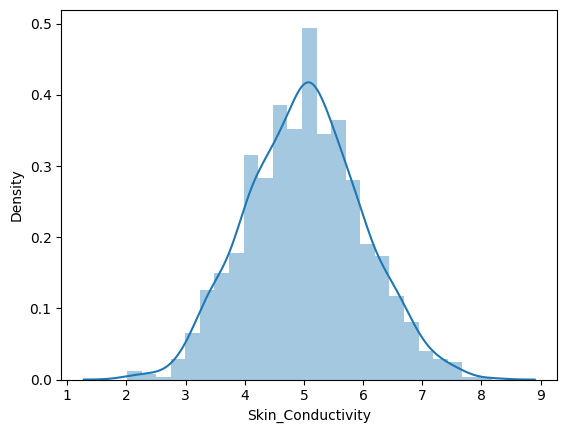

In [139]:
#  distribution plot for Skin_Conductivity column
sns.distplot(df['Skin_Conductivity'])

C:\Users\user\AppData\Local\Temp\ipykernel_8616\2938904501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hours_Worked'])


<Axes: xlabel='Hours_Worked', ylabel='Density'>

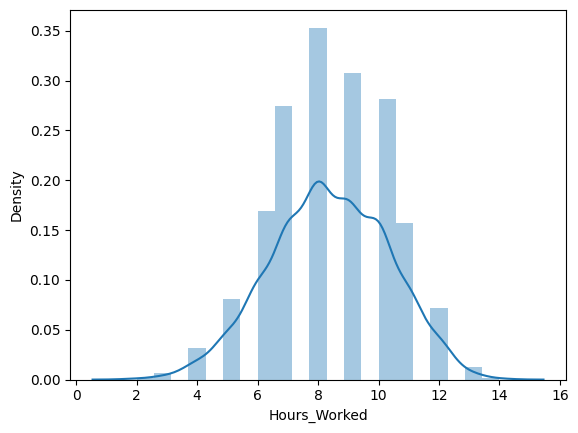

In [140]:

#  distribution plot for Hours_Worked column
sns.distplot(df['Hours_Worked'])

C:\Users\user\AppData\Local\Temp\ipykernel_8616\1412489661.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Emails_Sent'])


<Axes: xlabel='Emails_Sent', ylabel='Density'>

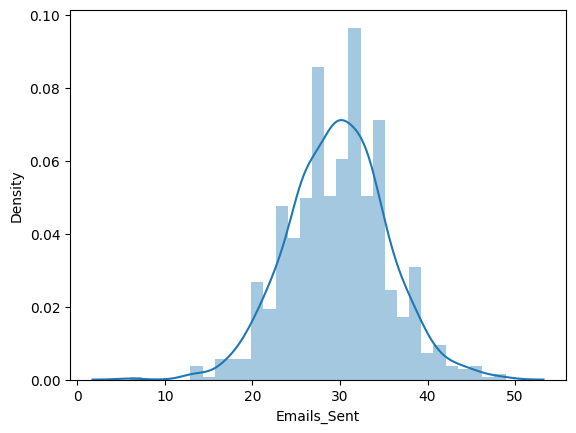

In [141]:
#  distribution plot for Emails_Sent column
sns.distplot(df['Emails_Sent'])

C:\Users\user\AppData\Local\Temp\ipykernel_8616\3159842197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Meetings_Attended'])


<Axes: xlabel='Meetings_Attended', ylabel='Density'>

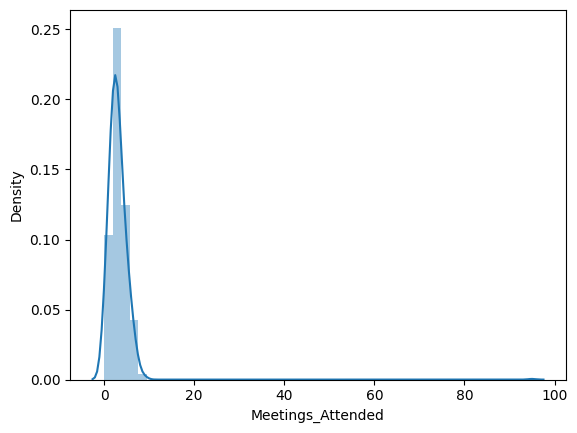

In [142]:

#  distribution plot for Meetings_Attended column
sns.distplot(df['Meetings_Attended'])

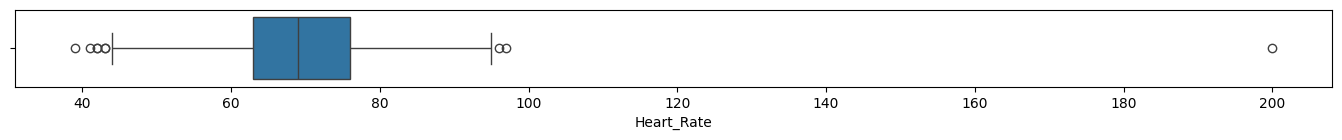

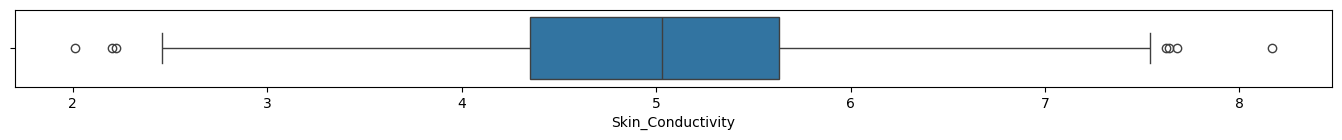

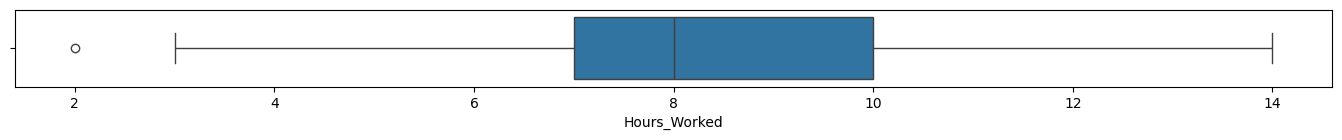

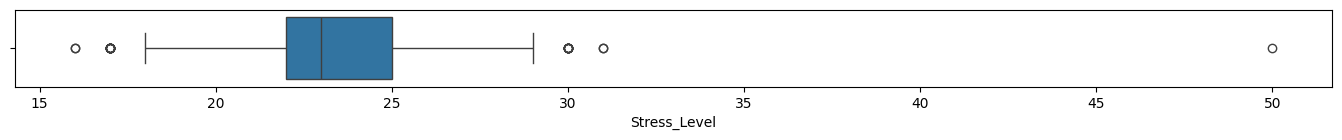

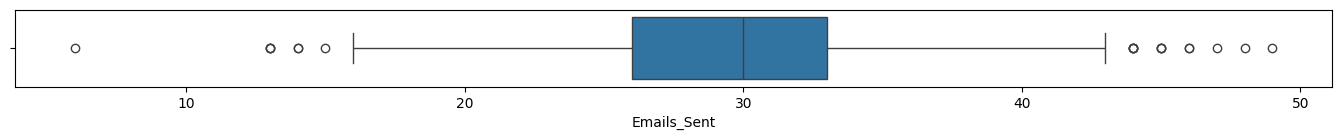

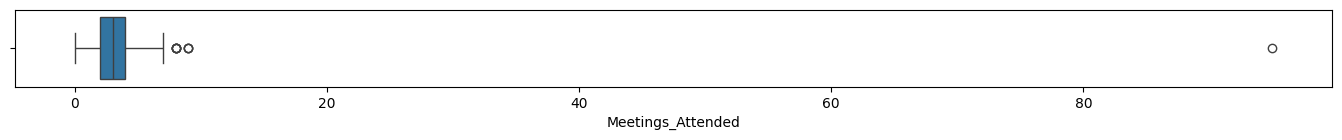

In [143]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

<Figure size 1700x100 with 0 Axes>

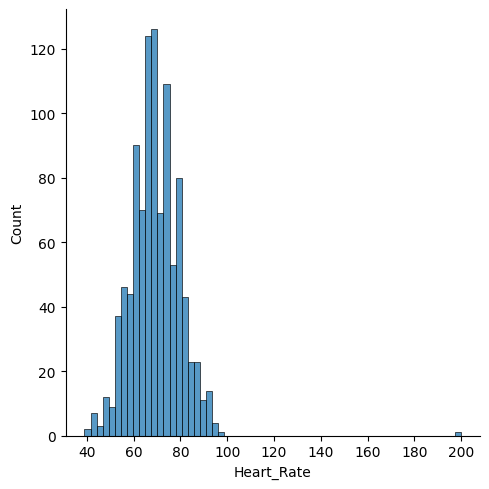

<Figure size 1700x100 with 0 Axes>

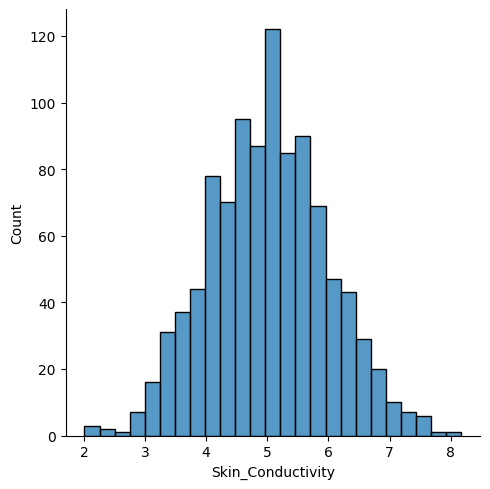

<Figure size 1700x100 with 0 Axes>

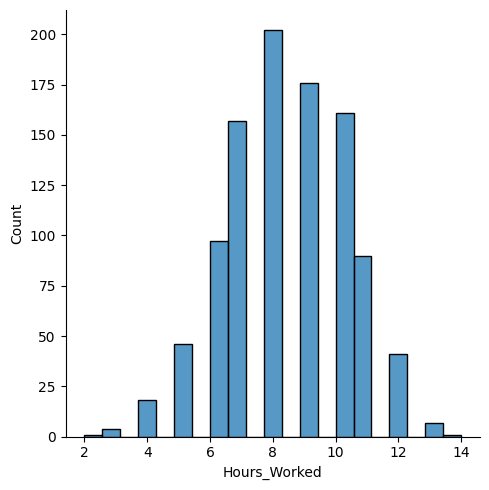

<Figure size 1700x100 with 0 Axes>

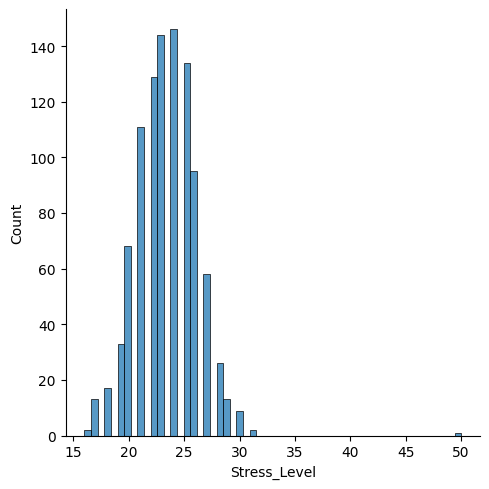

<Figure size 1700x100 with 0 Axes>

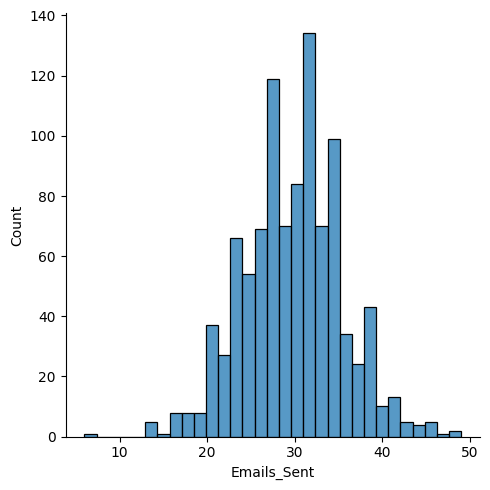

<Figure size 1700x100 with 0 Axes>

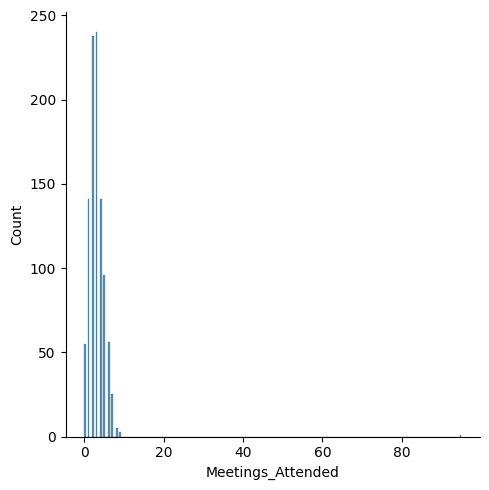

In [144]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

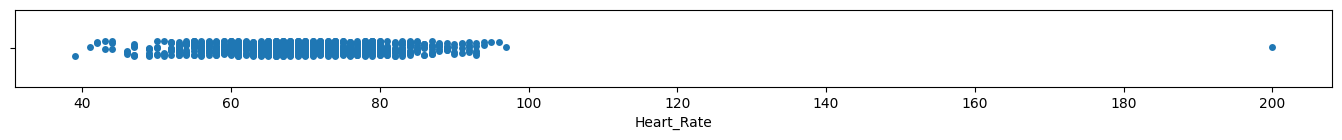

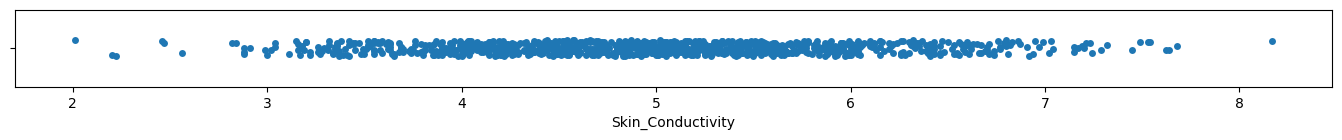

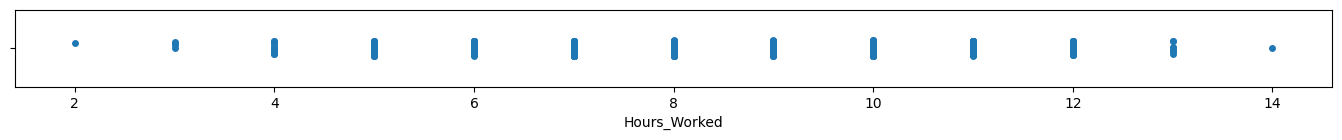

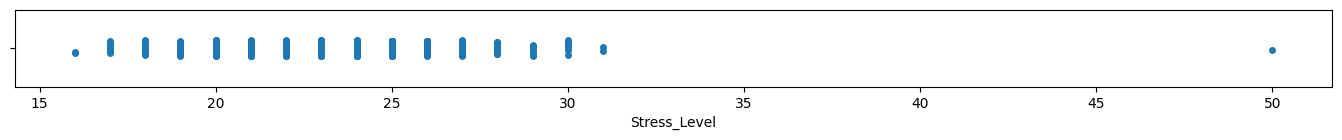

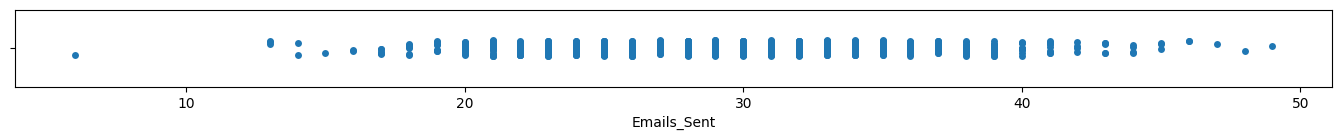

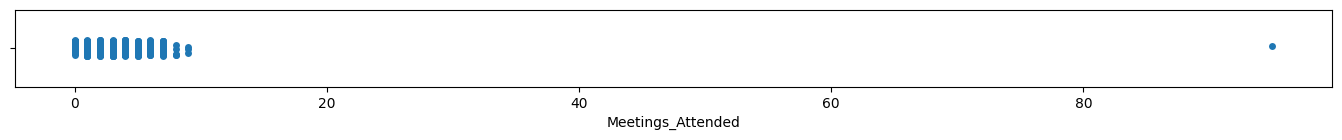

In [145]:
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

array([[<Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'Skin_Conductivity'}>],
       [<Axes: title={'center': 'Hours_Worked'}>,
        <Axes: title={'center': 'Stress_Level'}>],
       [<Axes: title={'center': 'Emails_Sent'}>,
        <Axes: title={'center': 'Meetings_Attended'}>]], dtype=object)

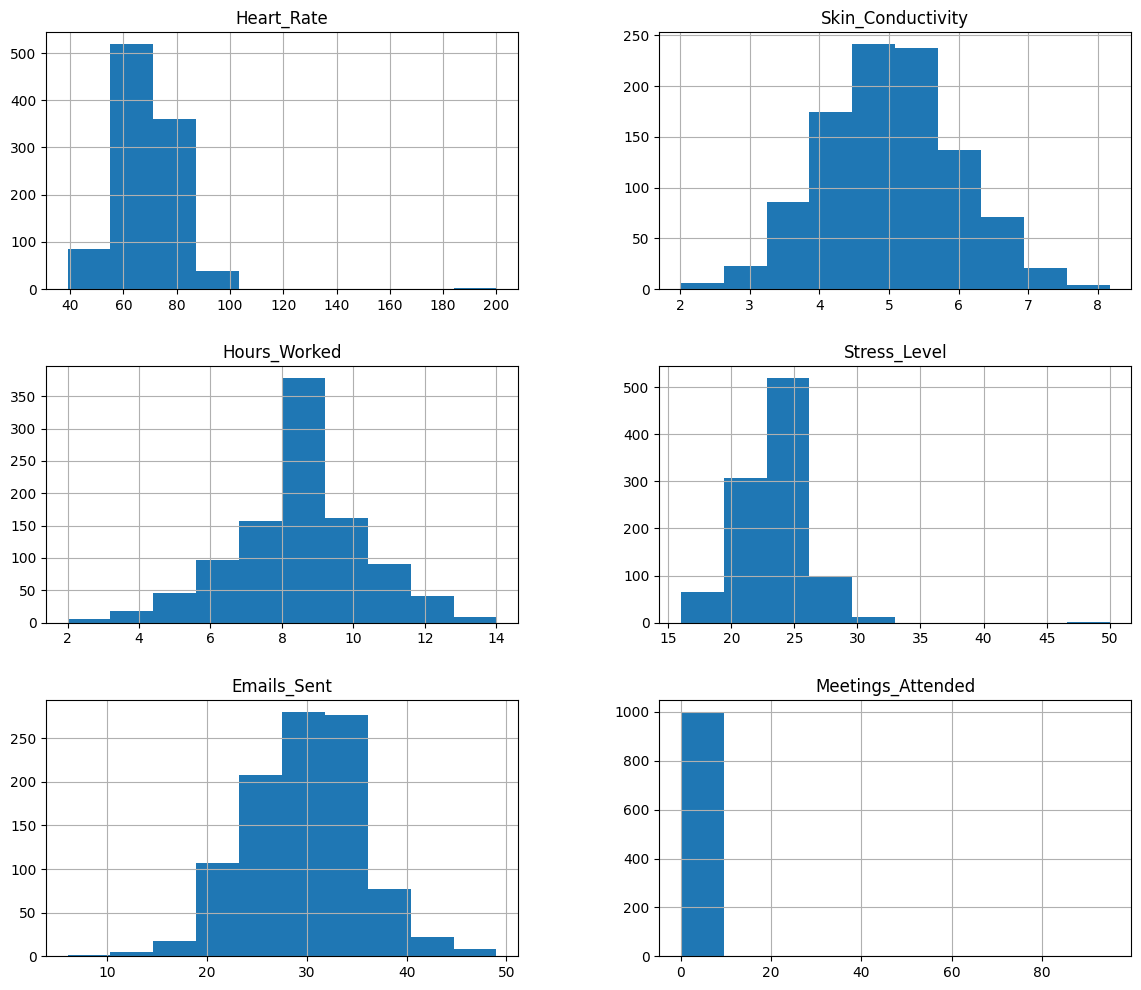

In [146]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column

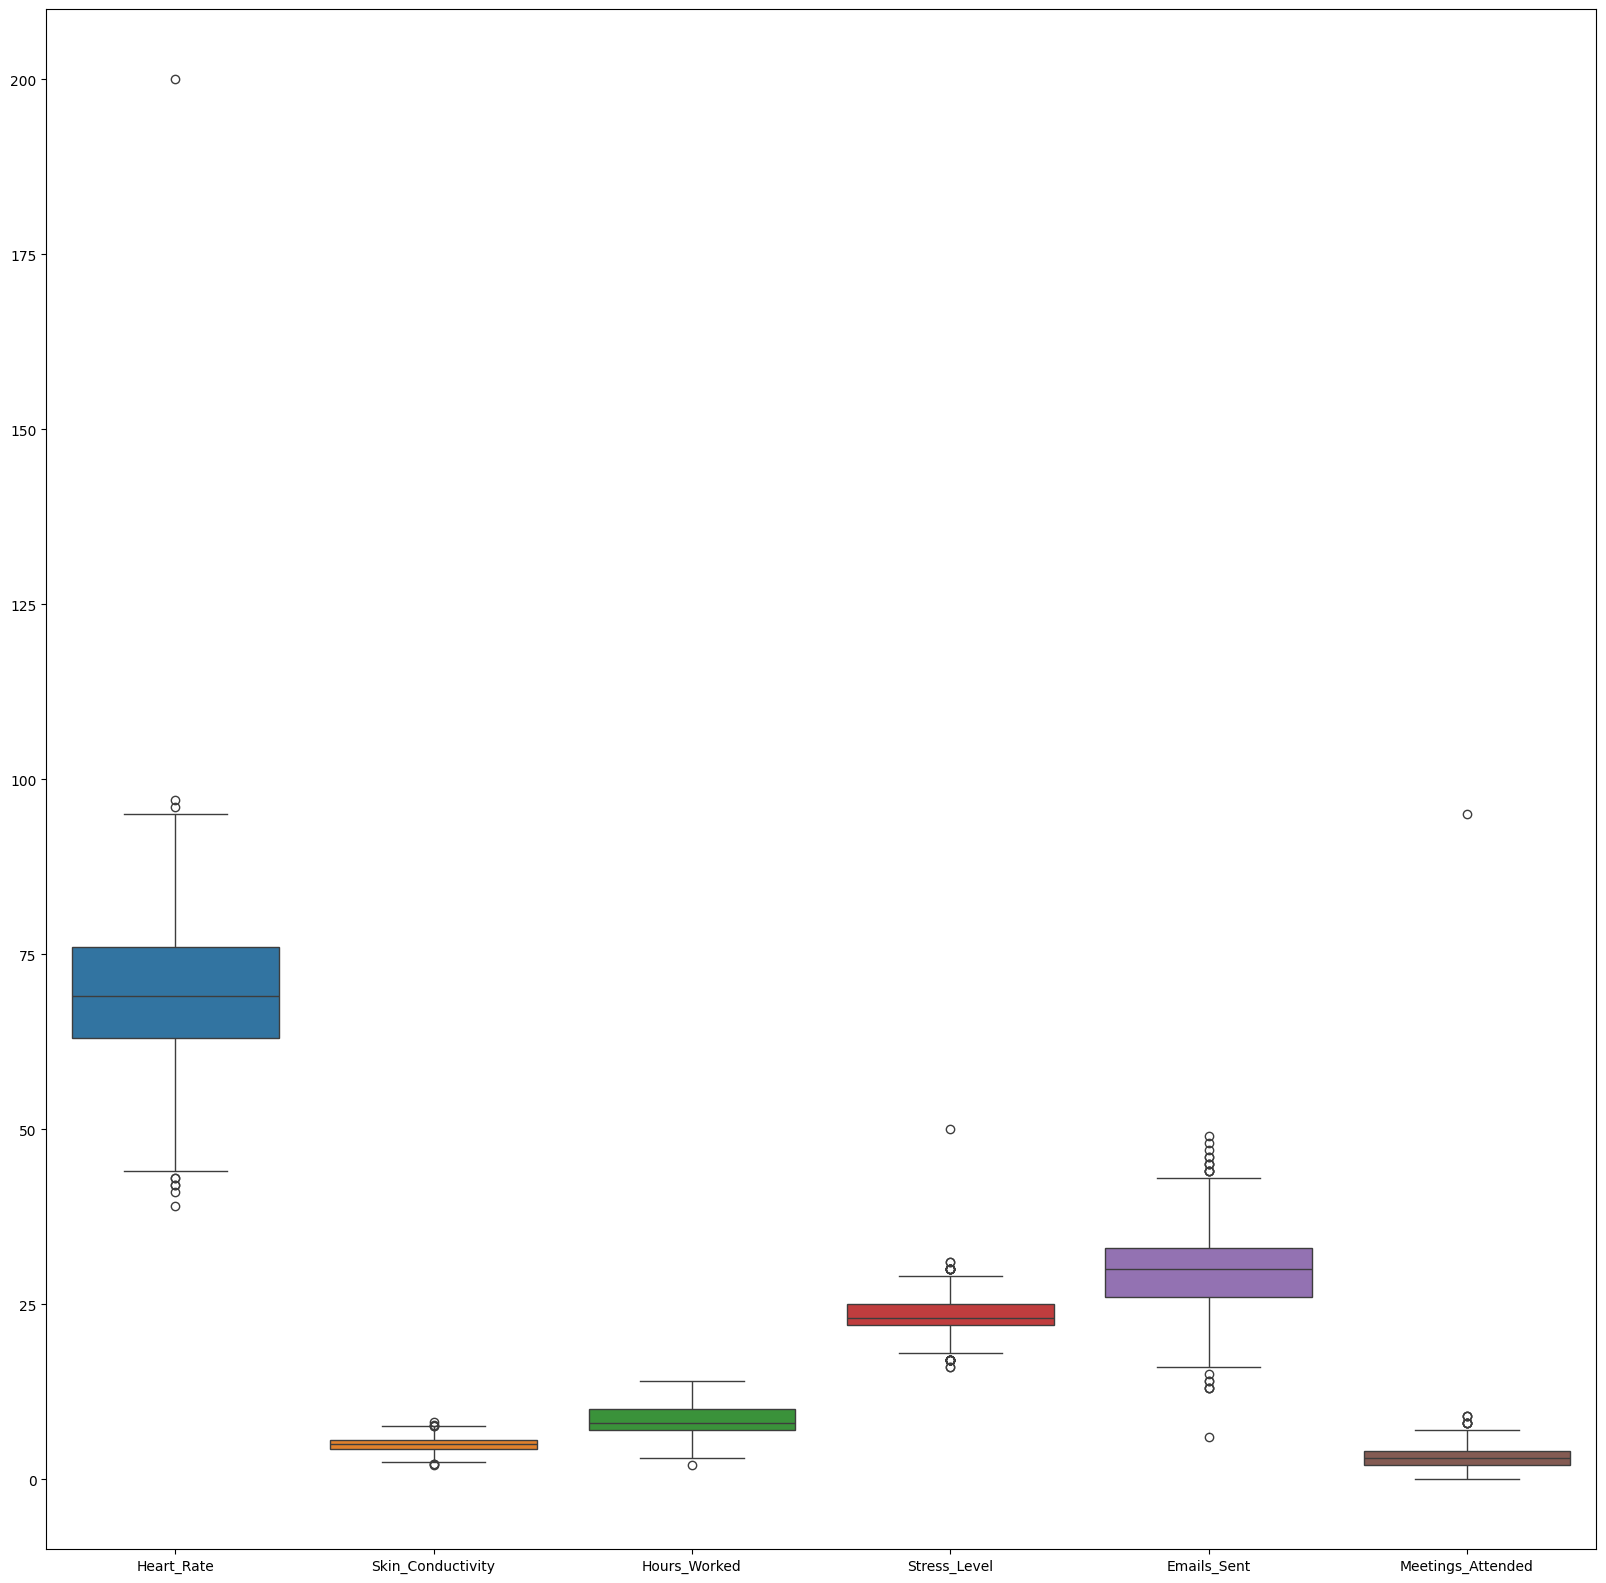

In [147]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

# **Data Preprocessing**

<Axes: >

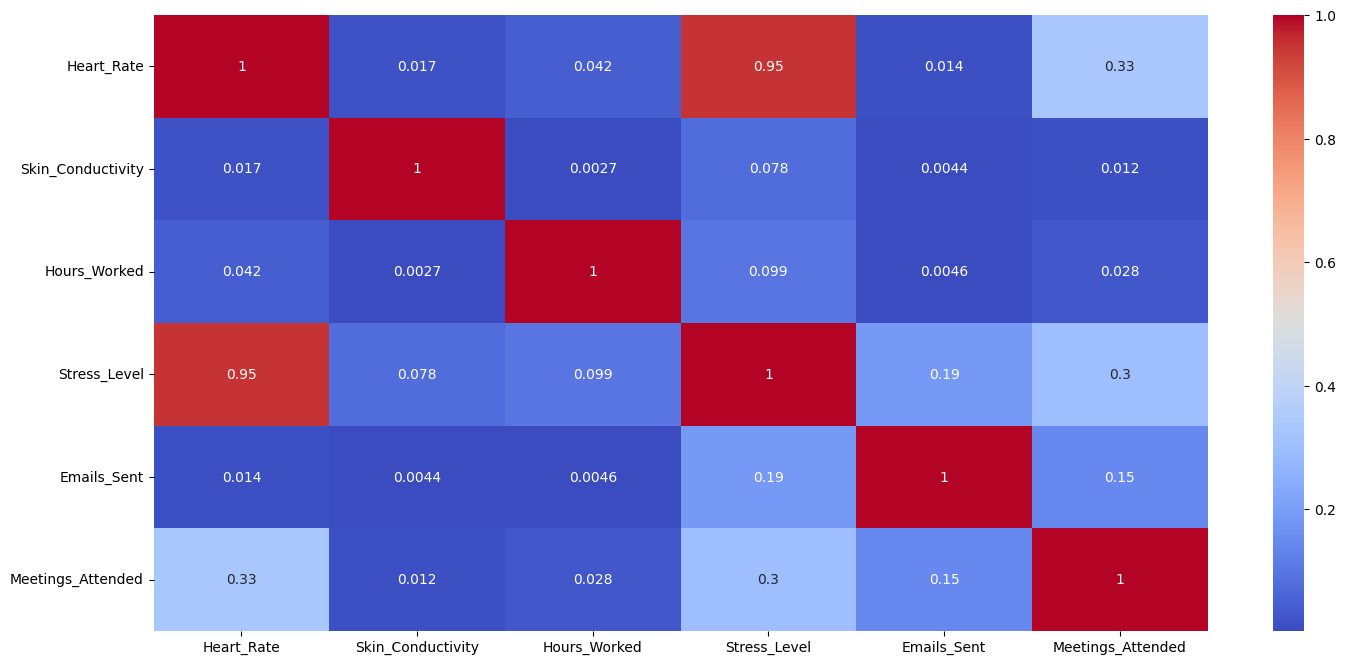

In [148]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### **Splitting of data into train and test**

In [149]:
x = df.drop(['Stress_Level'], axis=1)
y = df['Stress_Level']

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [151]:
x_test

,Heart_Rate,Skin_Conductivity,Hours_Worked,Emails_Sent,Meetings_Attended
521,60,4.60,10,23,4
941,82,6.20,6,32,1
741,58,4.10,7,32,4
980,73,4.21,8,38,4
411,78,3.52,8,33,6
...,...,...,...,...,...
936,59,4.53,10,32,0
428,64,3.89,9,25,7
7,68,3.18,8,30,1
155,63,6.40,5,25,4


In [152]:
y_test

521    21
941    26
741    20
980    25
411    26
       ..
936    21
428    22
7      22
155    21
541    19
Name: Stress_Level, Length: 301, dtype: int64

# **Model Building**

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

# RandomForestRegressor

In [154]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [155]:
pred_rf = rf.predict(x_test)

In [156]:
rf_r2 = r2_score(pred_rf,y_test)
rf_r2

0.9623879751067935

In [157]:
rf_ma = mean_absolute_error(pred_rf,y_test)
rf_ma

0.3677076411960134

In [158]:
rf_sq = mean_squared_error(pred_rf,y_test)
rf_sq

0.23149169435215952

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Training accuracy
train_pred = rf.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)

# Testing accuracy
test_pred = rf.predict(x_test)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.6312292358803987


# AdaBoostRegressor

In [160]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [161]:
pred_ad = ad.predict(x_test)

In [162]:
ad_r2 = r2_score(pred_ad,y_test)
ad_r2

0.9174527007250977

In [163]:
ad_ma = mean_absolute_error(pred_ad,y_test)
ad_ma

0.5525980567320142

In [164]:
ad_sq = mean_squared_error(pred_ad,y_test)
ad_sq

0.4887571757406294

# ExtraTreeRegressor

In [165]:
ex = ExtraTreeRegressor()
ex.fit(x_train,y_train)

ExtraTreeRegressor()

In [166]:
pred_ex = ex.predict(x_test)

In [167]:
ex_r2 = r2_score(pred_ex,y_test)
ex_r2

0.9129065409060221

In [168]:
ex_ma = mean_absolute_error(pred_ex,y_test)
ex_ma

0.4983388704318937

In [169]:
ex_sq = mean_squared_error(pred_ex,y_test)
ex_sq

0.5780730897009967

### **Stacking Classifier**

In [170]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base classifiers
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42))
]

# Meta-classifier
meta_model = LogisticRegression()

# Create the stacking classifier
STC = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
STC.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:1380: RuntimeWarning: Number of classes in training fold (15) does not match total number of classes (16). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:1380: RuntimeWarning: Number of classes in training fold (15) does not match total number of classes (16). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Pyt

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())

In [171]:
# Make predictions
y_pred = STC.predict(x_test)

# Evaluate the performance
accuracy = r2_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy}')

Stacking Classifier Accuracy: 0.925008574331364


In [172]:
import pickle
with open("STC_model.pkl", "wb") as fp:
    pickle.dump(STC, fp)

### **SVM**

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [174]:
y_pred = dt.predict(x_test)
acc_dt = r2_score(y_test, y_pred)
acc_dt

0.9269564035695104

In [175]:
graph5 = pd.DataFrame({'Models':['Random Forest Regressor','AdaBoostRegressor','ExtraTreeRegressor', "STC","Decision Tree"],
                       'Accuracy':[rf_r2*100,ad_r2*100,ex_r2*100, accuracy*100, acc_dt*100]})
graph5

,Models,Accuracy
0,Random Forest Regressor,96.238798
1,AdaBoostRegressor,91.745270
2,ExtraTreeRegressor,91.290654
3,STC,92.500857
4,Decision Tree,92.695640


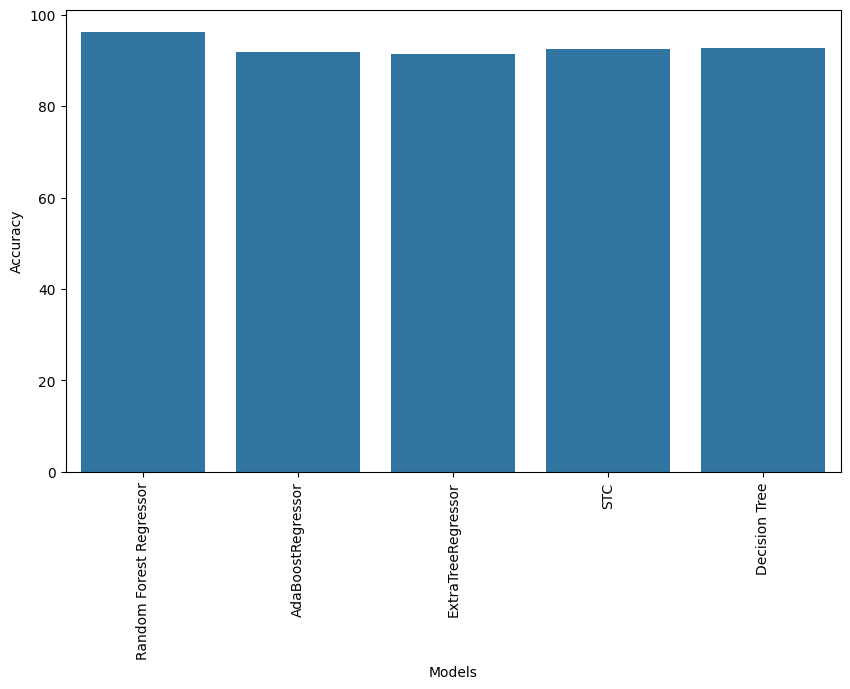

In [176]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph5.Accuracy,x = graph5.Models)
plt.xticks(rotation = 'vertical')
plt.show()

# **Prediction**

In [177]:
df

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,87,5.56,5,28,31,6
1,74,5.89,5,25,42,3
2,79,4.58,9,26,28,4
3,92,5.10,7,30,37,3
4,88,5.23,8,29,35,6
...,...,...,...,...,...,...
996,68,6.40,7,24,31,5
997,70,5.16,8,23,27,3
998,58,3.86,6,21,34,6
999,66,3.69,8,22,36,1


In [178]:
abc=[66,3.69,8,36,1]
result=rf.predict([abc])
result


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([23])

In [179]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load trained model
with open('STC_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Make predictions
y_pred = model.predict(x_test)

# If your predictions are numeric scores, convert them to categories
def categorize_stress(score):
    if score <= 25:
        return 'Low'
    elif score <= 28.99:
        return 'Moderate'
    else:
        return 'High'

# Apply categorization if needed
if isinstance(y_pred[0], (float, int)):
    y_pred = [categorize_stress(s) for s in y_pred]
    y_test = [categorize_stress(s) for s in y_test]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision and Recall (macro average to handle multiple classes)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Detailed classification report
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", report)


Accuracy: 0.64
Precision: 0.44
Recall: 0.43

Classification Report:
               precision    recall  f1-score   support

          16       0.00      0.00      0.00         2
          17       0.50      0.50      0.50         2
          18       0.00      0.00      0.00         4
          19       0.44      0.44      0.44         9
          20       0.65      0.65      0.65        23
          21       0.59      0.59      0.59        29
          22       0.58      0.62      0.60        40
          23       0.69      0.73      0.71        49
          24       0.76      0.70      0.73        40
          25       0.60      0.78      0.67        36
          26       0.79      0.71      0.75        31
          27       0.75      0.68      0.71        22
          28       0.12      0.20      0.15         5
          29       0.00      0.00      0.00         5
          30       0.50      0.33      0.40         3
          31       0.00      0.00      0.00         1

    accurac

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier